In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz
from sklearn.metrics import confusion_matrix, classification_report
import graphviz
import matplotlib.pyplot as plt

In [3]:
# Load the dataset
# https://www.kaggle.com/datasets/akshaydattatraykhare/diabetes-dataset
df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
# Split features X, and labes y
# Exclude the target column
X = df.drop(columns=['Outcome'])
y = df['Outcome']
print(df.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [5]:
# Display the shape of X and y
print(X.shape)
print(y.shape)

(768, 8)
(768,)


In [6]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

# Display the shapes of the training and testing sets
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (614, 8)
X_test shape: (154, 8)
y_train shape: (614,)
y_test shape: (154,)


In [7]:
# Initialize the Decision Tree Classifier
dtc = DecisionTreeClassifier(random_state=42, max_depth=5)
dtc.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 5,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': 42,
 'splitter': 'best'}

In [8]:
# Fit the model with the training data
dtc.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [9]:
# predict the test set
y_pred = dtc.predict(X_test)


In [10]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[87 12]
 [20 35]]
              precision    recall  f1-score   support

           0       0.81      0.88      0.84        99
           1       0.74      0.64      0.69        55

    accuracy                           0.79       154
   macro avg       0.78      0.76      0.77       154
weighted avg       0.79      0.79      0.79       154



In [11]:
importances = dtc.feature_importances_
print(importances)
for feature, importance in zip(X.columns, importances):
    print(f"{feature}: {importance}")

[0.         0.48414818 0.0670162  0.         0.00904445 0.19280417
 0.07612256 0.17086443]
Pregnancies: 0.0
Glucose: 0.48414818156488787
BloodPressure: 0.06701619853384629
SkinThickness: 0.0
Insulin: 0.009044450794918191
BMI: 0.19280417466313213
DiabetesPedigreeFunction: 0.07612256446071858
Age: 0.17086442998249698


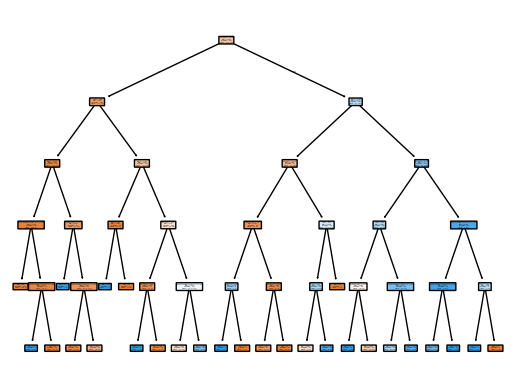

In [12]:
plot_tree(dtc, filled=True, rounded=True, feature_names=X.columns.tolist(), class_names=['No Diabetes', 'Diabetes'])
plt.show()

In [13]:
dot_data = export_graphviz(dtc,out_file=None,feature_names=X.columns.to_list(),filled=True,rounded=True,special_characters=True)
graph = graphviz.Source(dot_data)
graph.render()

ExecutableNotFound: failed to execute PosixPath('dot'), make sure the Graphviz executables are on your systems' PATH